# HOUSING DATASET





# Reading Data

In [11]:
# Importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [12]:
# Reading the Dataset
housing = pd.read_csv("C:/Users/dell/Downloads/housing/housing.csv", na_values = '')

In [13]:
# Take a quick look at the data structure
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data Exploration

In [14]:
# To see the description of the data
# In particular to see shape and number of null values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
# Checking null values
# Sum gives us the count of the null values in the particular column
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [16]:
# Take a quick look at the statistical description of the dataset
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Data Visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205ECDD3AC8>,
      dtype=object)

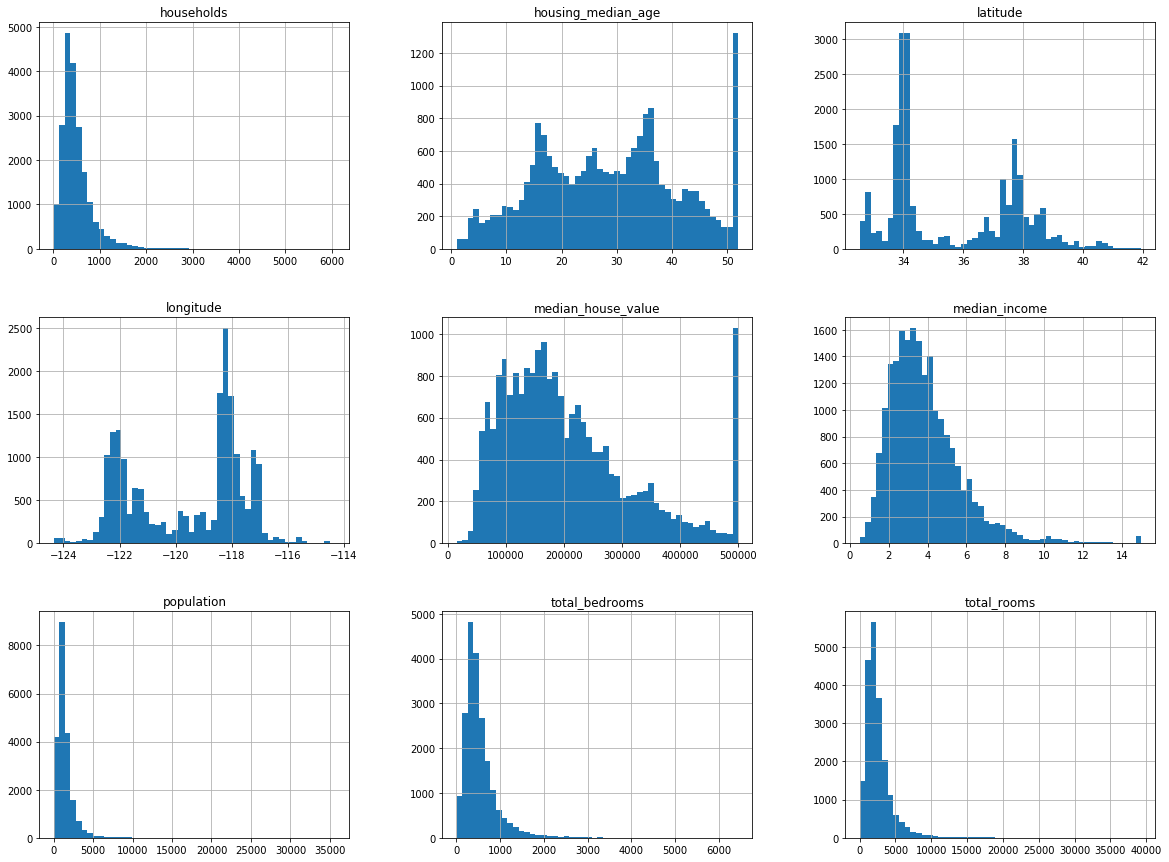

In [17]:
# Visualising to check if there's any scaled values in the dataset
# Looks like multiple columns are scaled to particular value
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))

# Decoupling target

In [20]:
# Splitting the dataset into Train and Test
# Splitting in order to validate the model with the unseen data
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [23]:
housing_train = train_set
housing_test  = test_set

In [25]:
# Separating Target column with remaining columns
# Further splitting the Train dataset into train and test 
y = housing_train['median_house_value']
X = housing_train[housing_train.columns.difference(['median_house_value'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [26]:
print(len(train_set))
print(len(test_set))

16512
4128


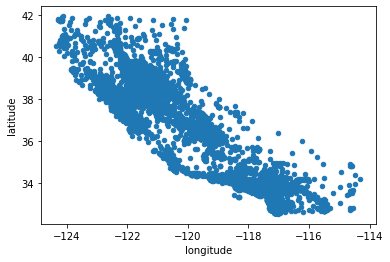

In [27]:
# checking how data is scattered to see any particular pattern

housing.plot(kind='scatter', x='longitude', y='latitude')

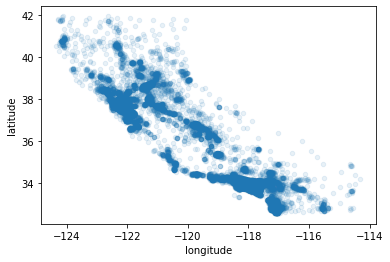

In [28]:
# setting alpha value to visualize the places where there is high density locality

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

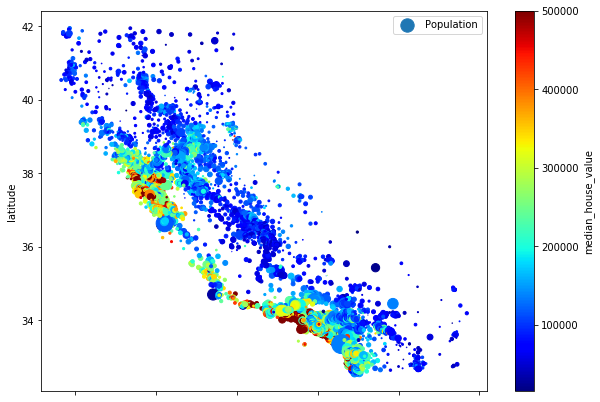

In [29]:
# Housing prices
# Red is expensive, blue is cheap
# Larger circles indicate areas with a large population

housing.plot(kind='scatter',x= 'longitude',y= 'latitude', s= housing["population"]/100, label= 'Population', c= 'median_house_value', colorbar= True, figsize= (10,7), cmap= plt.get_cmap("jet"))

# Looking for Correlations

In [30]:
# Finding correlation between columns with respect to Target column
corr_matrix= housing.corr()
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [31]:
housing_train = train_set
housing_test  = test_set

In [32]:
X_train.head()

,households,housing_median_age,latitude,longitude,median_income,ocean_proximity,population,total_bedrooms,total_rooms
16490,258.0,27.0,38.00,-120.97,4.7069,INLAND,873.0,288.0,1683.0
6090,1267.0,15.0,34.10,-117.87,3.8750,<1H OCEAN,3359.0,1363.0,6409.0
10973,437.0,26.0,33.76,-117.85,2.8828,<1H OCEAN,1273.0,525.0,2312.0
17287,257.0,34.0,34.35,-119.74,5.0000,NEAR OCEAN,705.0,292.0,1664.0
12615,739.0,25.0,38.50,-121.51,5.0371,INLAND,1857.0,745.0,4719.0


# Dealing with missing values

In [33]:
# Segregating categorical columns from numerical columns for imputing missing values

cat_cols = ['ocean_proximity']
num_cols = X_train.columns.difference(cat_cols)

In [34]:
# Importing SimpleImputer library
# Imputing with most frequency for categorical columns
# Imputing with median for numerical columns

from sklearn.impute import SimpleImputer


median_imputer = SimpleImputer(strategy="median")
median_imputer.fit(X_train[num_cols])

X_train[num_cols] = median_imputer.transform(X_train[num_cols])
X_test[num_cols] = median_imputer.transform(X_test[num_cols])

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

In [35]:
# converting categorical columns into binary by dummyfication

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

## DataFrame alignment = making sure train and test data has same set of columns
X_train, X_test = X_train.align(X_test, join="outer", axis=1)

print(X_train.shape)
print(X_test.shape)

(13209, 13)
(3303, 13)


# Standardisation

In [36]:
# Standardising numerical variables to get every attribute metric to same range of scale

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X_train[num_cols])

X_train[num_cols] = std_scaler.transform(X_train[num_cols])
X_test[num_cols] = std_scaler.transform(X_test[num_cols])

In [37]:
X_train.describe()

,households,housing_median_age,latitude,longitude,median_income,population,total_bedrooms,total_rooms,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,1.320900e+04,1.320900e+04,1.320900e+04,1.320900e+04,1.320900e+04,1.320900e+04,1.320900e+04,1.320900e+04,13209.000000,13209.000000,13209.000000,13209.000000,13209.000000
mean,-9.641433e-17,-3.590637e-17,-1.171076e-15,5.836979e-15,1.106798e-16,8.405050e-19,1.839781e-16,5.511191e-17,0.442728,0.319252,0.000151,0.112878,0.124991
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,0.496728,0.466204,0.012304,0.316455,0.330721
min,-1.322028e+00,-2.189791e+00,-1.446668e+00,-2.377181e+00,-1.782723e+00,-1.252157e+00,-1.294680e+00,-1.225910e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.773797e-01,-8.394051e-01,-8.046103e-01,-1.110467e+00,-6.920927e-01,-5.600888e-01,-5.787058e-01,-5.487870e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.343097e-01,3.437410e-02,-6.452674e-01,5.352629e-01,-1.708273e-01,-2.276848e-01,-2.424882e-01,-2.365191e-01,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.842845e-01,6.698499e-01,9.715945e-01,7.846159e-01,4.642582e-01,2.638861e-01,2.678853e-01,2.404921e-01,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.484747e+01,1.861367e+00,2.954008e+00,2.629829e+00,5.890054e+00,3.012308e+01,1.428985e+01,1.707178e+01,1.000000,1.000000,1.000000,1.000000,1.000000


# Model learning

In [38]:
# importing library to apply linear regression algorithm

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
# coefficients 

linear_model.coef_

array([ 19263.76885884,  13896.70264133, -55676.74117815, -54901.04886509,
        74956.39082446, -42839.42087778,  42331.53790607, -14293.60385551,
       -34700.02641282, -72770.89718636, 176698.83099936, -39596.91660227,
       -29630.99079792])

In [40]:
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# Predictions

In [41]:
# Train prediction comparions

pd.DataFrame({"Actual":y_train,"Predicted":y_train_pred})

,Actual,Predicted
16490,176900.0,178068.709861
6090,173300.0,223459.591285
10973,204700.0,182082.030701
17287,329400.0,308938.111262
12615,180200.0,204867.378518
13392,118800.0,128460.621680
9911,166700.0,151886.588194
10758,500001.0,290193.402268
1864,116700.0,137003.439883
4666,193800.0,136537.048125


In [42]:
# Test prediction comparions

pd.DataFrame({"Actual":y_test,"Predicted":y_test_pred})

,Actual,Predicted
2071,96700.0,144732.502635
2612,75500.0,134536.973709
10838,430900.0,306148.869328
4061,332600.0,222540.172866
10767,500001.0,350808.094415
9778,137900.0,209569.189577
11317,179600.0,172244.312499
2454,95700.0,106716.497116
10394,170800.0,235887.675951
20002,42500.0,59874.135017


# Model validation

In [43]:
# Importing libraries for error metrics

from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))

print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

4638998702.146053
4871132962.33882
0.6501105234928446
0.6470162481990558
